In [1]:
import os, sys

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [2]:
# 0. MNIST 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [3]:
# 1. 실험용 설정
weight_init_types = {'std=0.01' : 0.01, 'Xavier' : 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}

for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

In [4]:
# 2. 훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
        
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
        
        if i % 100 == 0:
            print("==========" + "iteration: " + str(i) + "==========")
            for key in weight_init_types.keys():
                loss = networks[key].loss(x_batch, t_batch)
                print(key + " : " + str(loss))

==========iteration: 0==========
std=0.01 : 2.302531691160107
Xavier : 2.314232980629377
He : 2.386286009010493
==========iteration: 0==========
std=0.01 : 2.302531691160107
Xavier : 2.3130535216935737
He : 2.386286009010493
==========iteration: 0==========
std=0.01 : 2.302531691160107
Xavier : 2.3130535216935737
He : 2.3687947226868804
==========iteration: 100==========
std=0.01 : 2.302039842131359
Xavier : 2.249098154702002
He : 1.6214852117730167
==========iteration: 100==========
std=0.01 : 2.302039842131359
Xavier : 2.2475989889793677
He : 1.6214852117730167
==========iteration: 100==========
std=0.01 : 2.302039842131359
Xavier : 2.2475989889793677
He : 1.6014375296040497
==========iteration: 200==========
std=0.01 : 2.3016199104490807
Xavier : 2.1258557349564615
He : 0.8769012851062276
==========iteration: 200==========
std=0.01 : 2.3016199104490807
Xavier : 2.122542169765259
He : 0.8769012851062276
==========iteration: 200==========
std=0.01 : 2.3016199104490807
Xavier : 2.12254

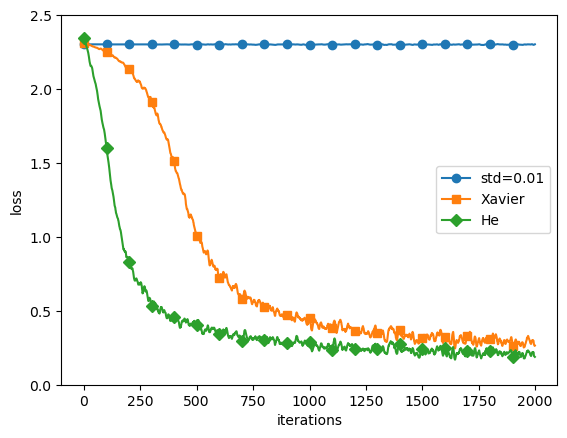

In [8]:
# 3. 그래프 그리기
markers = {"std=0.01" : "o", "Xavier" : 's', "He" : 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)

plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()